In [43]:
import pandas as pd
path = r'D:\ML and DL Coading practce\Projects with Deployments\NLP Sentiment Analysis with Flask\sentiment.tsv'

data = pd.read_csv(path, sep='\t')

In [44]:
data.columns = ['label', 'text']
data.head(5)

,label,text
0,pos,having a vodka tonic and looking forward to go...
1,pos,@ddlovatofans1neg1 Could you follow me please....
2,pos,@jordanknight for once.................. PLEAS...
3,neg,Had a dream about a walk in fast food resturau...
4,pos,@TroyBrownBBNews Yes... For a &quot;friend&quot;


In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data.head(10)

,label,text
0,1,having a vodka tonic and looking forward to go...
1,1,@ddlovatofans1neg1 Could you follow me please....
2,1,@jordanknight for once.................. PLEAS...
3,0,Had a dream about a walk in fast food resturau...
4,1,@TroyBrownBBNews Yes... For a &quot;friend&quot;
5,1,Packing for work expierance
6,0,hates @internet @explrer (angry)(angry) **but ...
7,0,@federalcase I said I go out for eat 5:negneg...
8,0,@babykates7 yeah they won't do the surgery til...
9,1,@BritRuxpin. I say answering with no pants.


In [46]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\w+|#\w+', ' ', text)
    text = re.sub(r'http?:\S+',' ', text)
    text = re.sub(r'[^A-Za-z\s\']', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

data['clean_text'] = data['text'].apply(clean_text)

In [47]:
data.head(10)

,label,text,clean_text
0,1,having a vodka tonic and looking forward to go...,having a vodka tonic and looking forward to go...
1,1,@ddlovatofans1neg1 Could you follow me please....,could you follow me please i would really app...
2,1,@jordanknight for once.................. PLEAS...,for once please tell us why u were thinking o...
3,0,Had a dream about a walk in fast food resturau...,had a dream about a walk in fast food resturau...
4,1,@TroyBrownBBNews Yes... For a &quot;friend&quot;,yes for a quot friend quot
5,1,Packing for work expierance,packing for work expierance
6,0,hates @internet @explrer (angry)(angry) **but ...,hates angry angry but no choice
7,0,@federalcase I said I go out for eat 5:negneg...,i said i go out for eat negneg p m i disappoi...
8,0,@babykates7 yeah they won't do the surgery til...,yeah they won't do the surgery till the cold ...
9,1,@BritRuxpin. I say answering with no pants.,i say answering with no pants


In [48]:
from nltk.tokenize import word_tokenize
# Split text by whitespace to tokenize
data['tokenized_text'] = data['clean_text'].apply(lambda x: ' '.join(x.split()))
data.head(20)

,label,text,clean_text,tokenized_text
0,1,having a vodka tonic and looking forward to go...,having a vodka tonic and looking forward to go...,having a vodka tonic and looking forward to go...
1,1,@ddlovatofans1neg1 Could you follow me please....,could you follow me please i would really app...,could you follow me please i would really appr...
2,1,@jordanknight for once.................. PLEAS...,for once please tell us why u were thinking o...,for once please tell us why u were thinking of...
3,0,Had a dream about a walk in fast food resturau...,had a dream about a walk in fast food resturau...,had a dream about a walk in fast food resturau...
4,1,@TroyBrownBBNews Yes... For a &quot;friend&quot;,yes for a quot friend quot,yes for a quot friend quot
5,1,Packing for work expierance,packing for work expierance,packing for work expierance
6,0,hates @internet @explrer (angry)(angry) **but ...,hates angry angry but no choice,hates angry angry but no choice
7,0,@federalcase I said I go out for eat 5:negneg...,i said i go out for eat negneg p m i disappoi...,i said i go out for eat negneg p m i disappoin...
8,0,@babykates7 yeah they won't do the surgery til...,yeah they won't do the surgery till the cold ...,yeah they won't do the surgery till the cold i...
9,1,@BritRuxpin. I say answering with no pants.,i say answering with no pants,i say answering with no pants


In [50]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data['removed_stopwords'] = data['tokenized_text'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
data.head(20)

,label,text,clean_text,tokenized_text,removed_stopwords
0,1,having a vodka tonic and looking forward to go...,having a vodka tonic and looking forward to go...,having a vodka tonic and looking forward to go...,vodka tonic looking forward going saddle ranch...
1,1,@ddlovatofans1neg1 Could you follow me please....,could you follow me please i would really app...,could you follow me please i would really appr...,could follow please would really appreciate
2,1,@jordanknight for once.................. PLEAS...,for once please tell us why u were thinking o...,for once please tell us why u were thinking of...,please tell us u thinking person
3,0,Had a dream about a walk in fast food resturau...,had a dream about a walk in fast food resturau...,had a dream about a walk in fast food resturau...,dream walk fast food resturaunt sold ice cream...
4,1,@TroyBrownBBNews Yes... For a &quot;friend&quot;,yes for a quot friend quot,yes for a quot friend quot,yes quot friend quot
5,1,Packing for work expierance,packing for work expierance,packing for work expierance,packing work expierance
6,0,hates @internet @explrer (angry)(angry) **but ...,hates angry angry but no choice,hates angry angry but no choice,hates angry angry choice
7,0,@federalcase I said I go out for eat 5:negneg...,i said i go out for eat negneg p m i disappoi...,i said i go out for eat negneg p m i disappoin...,said go eat negneg p disappointed
8,0,@babykates7 yeah they won't do the surgery til...,yeah they won't do the surgery till the cold ...,yeah they won't do the surgery till the cold i...,yeah surgery till cold gone poor thing still r...
9,1,@BritRuxpin. I say answering with no pants.,i say answering with no pants,i say answering with no pants,say answering pants


In [52]:
from nltk.stem import WordNetLemmatizer

data['after_lemmatization'] = data['removed_stopwords'].apply(lambda x: ' '.join([WordNetLemmatizer().lemmatize(w) for w in x.split()]))
data.head(20)

,label,text,clean_text,tokenized_text,removed_stopwords,after_lemmatization
0,1,having a vodka tonic and looking forward to go...,having a vodka tonic and looking forward to go...,having a vodka tonic and looking forward to go...,vodka tonic looking forward going saddle ranch...,vodka tonic looking forward going saddle ranch...
1,1,@ddlovatofans1neg1 Could you follow me please....,could you follow me please i would really app...,could you follow me please i would really appr...,could follow please would really appreciate,could follow please would really appreciate
2,1,@jordanknight for once.................. PLEAS...,for once please tell us why u were thinking o...,for once please tell us why u were thinking of...,please tell us u thinking person,please tell u u thinking person
3,0,Had a dream about a walk in fast food resturau...,had a dream about a walk in fast food resturau...,had a dream about a walk in fast food resturau...,dream walk fast food resturaunt sold ice cream...,dream walk fast food resturaunt sold ice cream...
4,1,@TroyBrownBBNews Yes... For a &quot;friend&quot;,yes for a quot friend quot,yes for a quot friend quot,yes quot friend quot,yes quot friend quot
5,1,Packing for work expierance,packing for work expierance,packing for work expierance,packing work expierance,packing work expierance
6,0,hates @internet @explrer (angry)(angry) **but ...,hates angry angry but no choice,hates angry angry but no choice,hates angry angry choice,hate angry angry choice
7,0,@federalcase I said I go out for eat 5:negneg...,i said i go out for eat negneg p m i disappoi...,i said i go out for eat negneg p m i disappoin...,said go eat negneg p disappointed,said go eat negneg p disappointed
8,0,@babykates7 yeah they won't do the surgery til...,yeah they won't do the surgery till the cold ...,yeah they won't do the surgery till the cold i...,yeah surgery till cold gone poor thing still r...,yeah surgery till cold gone poor thing still r...
9,1,@BritRuxpin. I say answering with no pants.,i say answering with no pants,i say answering with no pants,say answering pants,say answering pant


In [53]:
wordcloud_text = ' '.join(data['after_lemmatization'])
wordcloud_text

"vodka tonic looking forward going saddle ranch westgate husband sans kiddos could follow please would really appreciate please tell u u thinking person dream walk fast food resturaunt sold ice cream guitar string sold gauge yes quot friend quot packing work expierance hate angry angry choice said go eat negneg p disappointed yeah surgery till cold gone poor thing still runny eye say answering pant place called negut take somebody still flying la ltr hayyy sleep deprived go look like wont getting early increible someone forgot u soo fast little girl holly find time aw she'll get load vote bet aapko huyi asuvidha ke liye hume khed hay train neg minute late ugh po going strong spent like hour playing rollercoaster tycoon i'm bored back think everyone quot keep waitin waitin waitin world change quot john mayer sinus infection whole left side face hurt i've seen pic phone wanna computer im rehab wish time extracurricular workout i've barely gym po time last neg day night may dream wonderfu

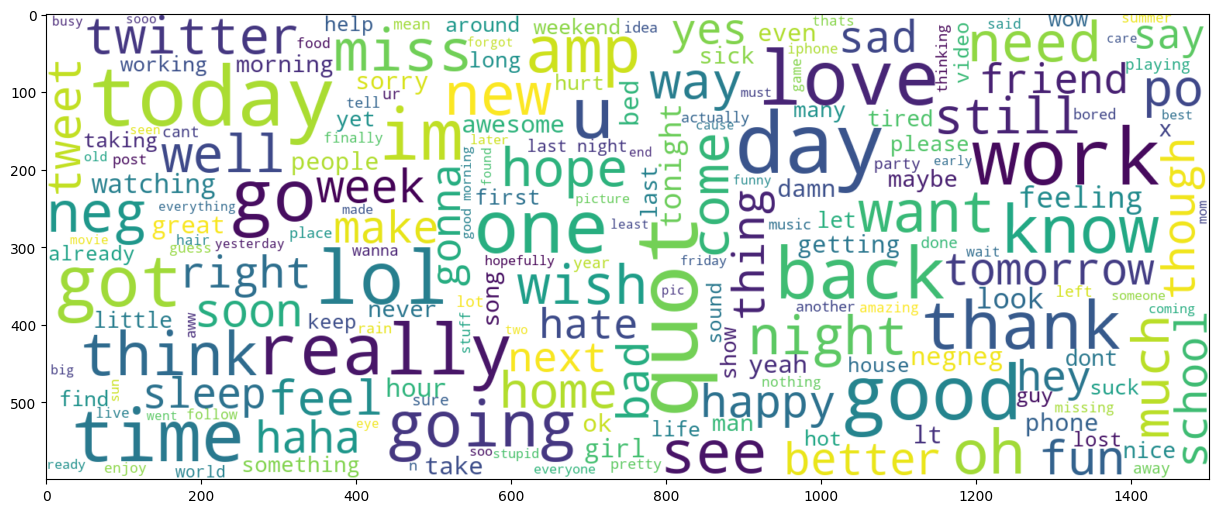

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
wordcloud_plot = WordCloud(width=1500, height=600, random_state=20, max_font_size=110, background_color='white').generate(wordcloud_text)
plt.imshow(wordcloud_plot, interpolation='bilinear')
plt.show()

#### count vectorization

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

countvector = CountVectorizer()
text_countvector = countvector.fit_transform(data['after_lemmatization'])
text_countvector

<2000x4309 sparse matrix of type '<class 'numpy.int64'>'
	with 13593 stored elements in Compressed Sparse Row format>

In [67]:
text_countvector.shape

(2000, 4309)

In [68]:
countvector.get_feature_names_out()

array(['aaaaaammmazzzingggg', 'aaaargh', 'aaah', ..., 'zoolander',
       'zoooo', 'zpos'], dtype=object)

#### TF -IDF vectorization

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvector = TfidfVectorizer()
text_tfidfvector = tfidfvector.fit_transform(data['after_lemmatization'])
text_tfidfvector

<2000x4309 sparse matrix of type '<class 'numpy.float64'>'
	with 13593 stored elements in Compressed Sparse Row format>

In [70]:
text_tfidfvector.shape

(2000, 4309)

In [71]:
tfidfvector.get_feature_names_out()

array(['aaaaaammmazzzingggg', 'aaaargh', 'aaah', ..., 'zoolander',
       'zoooo', 'zpos'], dtype=object)

#### Testing all clasification problems

In [79]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [80]:
clf = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    LogisticRegression(),
    #GaussianNB(),
    KNeighborsClassifier(),
    XGBClassifier()
]

In [81]:
for classifier in clf:
    score = cross_val_score(classifier,text_countvector, data['label'], cv=10)
    print(f'the score of {classifier} is {score.mean():.3f}')

the score of RandomForestClassifier() is 0.670
the score of GradientBoostingClassifier() is 0.650
the score of SVC() is 0.694
the score of DecisionTreeClassifier() is 0.624
the score of LogisticRegression() is 0.684
the score of KNeighborsClassifier() is 0.572
the score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tre

In [82]:
for classifier in clf:
    score = cross_val_score(classifier,text_tfidfvector, data['label'], cv=10)
    print(f'the score of {classifier} is {score.mean():.3f}')

the score of RandomForestClassifier() is 0.669
the score of GradientBoostingClassifier() is 0.634
the score of SVC() is 0.686
the score of DecisionTreeClassifier() is 0.625
the score of LogisticRegression() is 0.684
the score of KNeighborsClassifier() is 0.514
the score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tre

In [85]:
from sklearn.model_selection import train_test_split

X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(text_countvector, data['label'], test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(text_tfidfvector, data['label'], test_size=0.2, random_state=42)

In [86]:
for classifier in clf:
    classifier.fit(X_train_count, y_train_count)
    score = classifier.score(X_test_count, y_test_count)
    print(f'the score of {classifier} is {score:.3f}')

the score of RandomForestClassifier() is 0.647
the score of GradientBoostingClassifier() is 0.637
the score of SVC() is 0.695
the score of DecisionTreeClassifier() is 0.645
the score of LogisticRegression() is 0.695
the score of KNeighborsClassifier() is 0.562
the score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tre

In [87]:
for classifier in clf:
    classifier.fit(X_train_tfidf, y_train_tfidf)
    score = classifier.score(X_test_tfidf, y_test_tfidf)
    print(f'the score of {classifier} is {score:.3f}')

the score of RandomForestClassifier() is 0.662
the score of GradientBoostingClassifier() is 0.590
the score of SVC() is 0.718
the score of DecisionTreeClassifier() is 0.598
the score of LogisticRegression() is 0.720
the score of KNeighborsClassifier() is 0.515
the score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tre

In [88]:
model_name = 'lr_model.pkl'
import pickle

#pickle.dump(lr, open(model_name, 'wb'))
load_model = pickle.load(open(model_name, 'rb'))
result = load_model.predict(X_test_tfidf)
print(result)

NameError: name 'lr' is not defined

In [89]:
# Save the vectorizer
pickle.dump(text_tfidfvector, open("tfidf_vectorizer.pkl", "wb"))